In [79]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df1 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3 = pd.read_csv('E:\Dataset2\Cicids2017\\Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4 = pd.read_csv('E:\Dataset2\Cicids2017\\Monday-WorkingHours.pcap_ISCX.csv')
df5 = pd.read_csv('E:\Dataset2\Cicids2017\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('E:\Dataset2\Cicids2017\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df7 = pd.read_csv('E:\Dataset2\Cicids2017\\Tuesday-WorkingHours.pcap_ISCX.csv')
df8 = pd.read_csv('E:\Dataset2\Cicids2017\\Wednesday-workingHours.pcap_ISCX.csv')

In [81]:
df= pd.concat([df1, df2,df3,df4])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BENIGN'),
  Text(1, 0, 'DDoS'),
  Text(2, 0, 'PortScan'),
  Text(3, 0, 'Bot')])

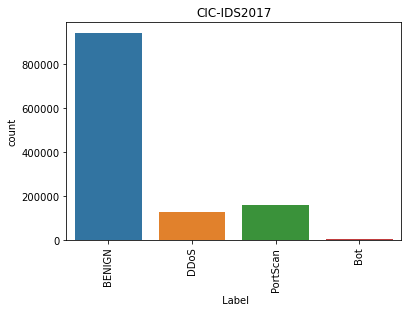

In [82]:
sns.countplot(x = " Label", data = df).set(title='CIC-IDS2017')
df[" Label"].value_counts()
plt.xticks(rotation=90)

In [83]:
df.shape
df.duplicated().sum()

114482

In [84]:
df =  df.drop_duplicates(keep="first")

In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             102
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [87]:
df.isna().mean()*100

 Destination Port              0.0
 Flow Duration                 0.0
 Total Fwd Packets             0.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
 Label                         0.0
Length: 79, dtype: float64

In [88]:
df.dropna(axis=0,inplace=True,how="any")

In [89]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN      897791
DDoS        128016
PortScan     90819
Name:  Label, dtype: int64

In [90]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [91]:
df.shape

(1116626, 79)

In [92]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [93]:
df = df.replace(0, np.nan)

In [94]:
df.dropna(how = "all", axis =1,inplace = True )
df.fillna(0, inplace = True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [95]:
df.dropna(how = "all", axis =0,inplace = True )
df.shape

(1115949, 69)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
#X_train = df.drop([' Label'], axis=1)
#Y_train = df[' Label']

In [98]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115949 entries, 0 to 529917
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Destination Port             1115949 non-null  float64
 1    Flow Duration                1115949 non-null  int32  
 2    Total Fwd Packets            1115949 non-null  int32  
 3    Total Backward Packets       1115949 non-null  float64
 4   Total Length of Fwd Packets   1115949 non-null  float64
 5    Total Length of Bwd Packets  1115949 non-null  float64
 6    Fwd Packet Length Max        1115949 non-null  float64
 7    Fwd Packet Length Min        1115949 non-null  float64
 8    Fwd Packet Length Mean       1115949 non-null  float32
 9    Fwd Packet Length Std        1115949 non-null  float32
 10  Bwd Packet Length Max         1115949 non-null  float64
 11   Bwd Packet Length Min        1115949 non-null  float64
 12   Bwd Packet Length Mean      

In [100]:
df = df.drop([' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Packet Length Mean',' Fwd Packet Length Std'],axis = 1)
df =df.drop([' Bwd Packet Length Mean',' Bwd Packet Length Std',' Flow IAT Std',' Flow IAT Max','Fwd IAT Total',' Fwd IAT Mean'],axis=1)
df =df.drop([' Fwd IAT Std',' Fwd IAT Max',' Bwd IAT Mean',' Bwd IAT Max',' Bwd IAT Min',' Fwd Header Length'],axis= 1)
df =df.drop([' Bwd Header Length','Fwd Packets/s',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance'],axis=1)
df =df.drop([' SYN Flag Count',' ECE Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size'],axis=1)
df =df.drop([' Fwd Header Length.1','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets'],axis=1)
df =df.drop([' Subflow Bwd Bytes',' act_data_pkt_fwd',' Active Max',' Active Min','Idle Mean'],axis=1)
df =df.drop([' Idle Max',' Idle Min'],axis=1)

In [120]:
df.shape

(1115949, 31)

In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [156]:
X_train = df.drop([' Label'], axis=1)
Y_train = df[' Label']

In [157]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [158]:
X_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.687500,3.0,0.0,3,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.687500,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,2,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.100917e+05,18348.623047,109.0,0.0,109,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311523,9174.311523,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9.0,6.0,6.0,20.0,1,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,2.307692e+05,38461.539062,52.0,0.0,52,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769531,19230.769531,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9.0,6.0,6.0,20.0,1,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34,1,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,3.529412e+05,58823.531250,34.0,0.0,34,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.765625,29411.765625,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9.0,6.0,6.0,20.0,1,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3,2,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,666666.687500,3.0,0.0,3,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.687500,0.000000,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,2,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435336 entries, 0 to 286466
Data columns (total 68 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             435336 non-null  float64
 1    Flow Duration                435336 non-null  int32  
 2    Total Fwd Packets            435336 non-null  int32  
 3    Total Backward Packets       435336 non-null  float64
 4   Total Length of Fwd Packets   435336 non-null  float64
 5    Total Length of Bwd Packets  435336 non-null  float64
 6    Fwd Packet Length Max        435336 non-null  float64
 7    Fwd Packet Length Min        435336 non-null  float64
 8    Fwd Packet Length Mean       435336 non-null  float32
 9    Fwd Packet Length Std        435336 non-null  float32
 10  Bwd Packet Length Max         435336 non-null  float64
 11   Bwd Packet Length Min        435336 non-null  float64
 12   Bwd Packet Length Mean       435336 non-nul

In [109]:
import numpy as np

# Assuming your array is named 'my_array'
X_train_size =X_train.size
print(X_train.shape)


(435336, 1, 68)


In [111]:
timesteps = 1
input_dim = 68
# Define an RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(timesteps, input_dim), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
import numpy as np

import pandas as pd

# Assuming X_train is your DataFrame
# Convert it to a NumPy arra

#df = X_train.to_numpy()
# Reshape X_train to have 3D shape (batch_size, timesteps, input_dim)
df =X_train.reshape(-1, timesteps, input_dim)


# Assuming X_train is your training data
# Reshape X_train to have 3D shape (batch_size, timesteps, input_dim)



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with your data
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
13605/13605 [==============================] - 43s 3ms/step - loss: -2788418.2500 - accuracy: 0.6899
Epoch 2/10
13605/13605 [==============================] - 39s 3ms/step - loss: -25065614.0000 - accuracy: 0.7003
Epoch 3/10
13605/13605 [==============================] - 40s 3ms/step - loss: -72998776.0000 - accuracy: 0.7038
Epoch 4/10
13605/13605 [==============================] - 38s 3ms/step - loss: -146974240.0000 - accuracy: 0.7046
Epoch 5/10
13605/13605 [==============================] - 27s 2ms/step - loss: -246579568.0000 - accuracy: 0.7055
Epoch 6/10
13605/13605 [==============================] - 27s 2ms/step - loss: -371324320.0000 - accuracy: 0.7059
Epoch 7/10
13605/13605 [==============================] - 27s 2ms/step - loss: -523597504.0000 - accuracy: 0.7061
Epoch 8/10
13605/13605 [==============================] - 27s 2ms/step - loss: -700262464.0000 - accuracy: 0.7066
Epoch 9/10
13605/13605 [==============================] - 28s 2ms/step - loss: -909370240.00

In [112]:
 from tensorflow.keras.models import Model

# Create a feature extraction model
feature_extraction_model = Model(inputs=model.input, outputs=model.layers[0].output)

# Extract features from your data
learned_features = feature_extraction_model.predict(X_train)

13605/13605 [==============================] - 19s 1ms/step


In [113]:
# Define a classifier or regressor (e.g., a dense neural network)
classifier = Sequential()
classifier.add(Dense(64, activation='relu', input_shape=(learned_features.shape[1],)))
classifier.add(Dense(1, activation='sigmoid'))  # For binary classification, adjust for your task

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(learned_features, Y_train, epochs=10, batch_size=32)

Epoch 1/10
13605/13605 [==============================] - 23s 2ms/step - loss: -11780240384.0000 - accuracy: 0.7206
Epoch 2/10
13605/13605 [==============================] - 22s 2ms/step - loss: -70591283200.0000 - accuracy: 0.7223
Epoch 3/10
13605/13605 [==============================] - 22s 2ms/step - loss: -177757257728.0000 - accuracy: 0.7220
Epoch 4/10
13605/13605 [==============================] - 22s 2ms/step - loss: -331668652032.0000 - accuracy: 0.7218
Epoch 5/10
13605/13605 [==============================] - 22s 2ms/step - loss: -531661291520.0000 - accuracy: 0.7217
Epoch 6/10
13605/13605 [==============================] - 22s 2ms/step - loss: -777583329280.0000 - accuracy: 0.7221
Epoch 7/10
13605/13605 [==============================] - 22s 2ms/step - loss: -1070756659200.0000 - accuracy: 0.7218
Epoch 8/10
13605/13605 [==============================] - 22s 2ms/step - loss: -1406948737024.0000 - accuracy: 0.7217
Epoch 9/10
13605/13605 [==============================] - 23s 2m

In [114]:
# List the names of the layers in your model
for layer in model.layers:
    print(layer.name)

simple_rnn_5
dense_7


In [115]:
from tensorflow.keras.models import Model

# Choose the layer for feature extraction
feature_extraction_layer = model.get_layer('dense_7')  # Replace with the actual layer name

# Create a feature extraction model
feature_extraction_model = Model(inputs=model.input, outputs=feature_extraction_layer.output)

In [116]:
# Extract features from your data
extracted_features = feature_extraction_model.predict(X_train)

13605/13605 [==============================] - 20s 1ms/step


In [117]:
import numpy as np

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = np.corrcoef(dataset, rowvar=False)  # Calculate the correlation matrix
    n = corr_matrix.shape[0]
    for i in range(n):
        for j in range(i):
            if abs(corr_matrix[i, j]) > threshold:
                col_corr.add(i)  # Add the index of the column instead of the name
    return col_corr


In [118]:
import numpy as np

# Assuming X_train is a 3D NumPy array (batch_size, timesteps, input_dim)
# You can reshape it into a 2D array like this:
X_train_2d = X_train.reshape(-1, X_train.shape[-1])

# Set the correlation threshold
threshold = 0.85

# Call the modified correlation function on X_train_2d
corr_features = correlation(X_train_2d, threshold)

# Print the indices of the correlated columns
print(corr_features)


{3, 5, 8, 9, 12, 13, 17, 18, 20, 21, 22, 23, 26, 28, 29, 31, 32, 33, 36, 37, 38, 39, 41, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 62, 63, 64, 66, 67}


In [125]:
# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Verify corr_features
print("Correlated features:", corr_features)

# Check the bounds of corr_features
if len(corr_features) > X_train.shape[1]:
    print("Error: Some indices in corr_features are out of bounds.")

     
    


Shape of X_train: (435336, 1, 68)
Correlated features: {3, 5, 8, 9, 12, 13, 17, 18, 20, 21, 22, 23, 26, 28, 29, 31, 32, 33, 36, 37, 38, 39, 41, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 62, 63, 64, 66, 67}
Error: Some indices in corr_features are out of bounds.


In [133]:
X_train_filtered.shape

(435336, 1, 30)

In [ ]:
selected_features=['Destination Port','Flow Duration','Total Fwd Packets','Fwd Packet Length Max','Fwd Packet Length Min',
                  'Bwd Packet Length Max','Bwd Packet Length Min','Flow Bytes/s','Flow Packets/s','Flow IAT Mean','Flow IAT Min',
                  'Fwd IAT Min','Bwd IAT Total','Bwd IAT Std','Fwd PSH Flags','Bwd Packets/s','Min Packet Length','FIN Flag Count',
                  'RST Flag Count','PSH Flag Count','ACK Flag Count','URG Flag Count','Down/Up Ratio','Init_Win_bytes_forward',
                   'Init_Win_bytes_backward','min_seg_size_forward','Active Mean','Active Std']

